# CS 475/675 Project


## Part 0: Load data and models


In [81]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#!unzip -q '/content/drive/MyDrive/ML final/archive.zip' -d '/content/drive/MyDrive/ML final'

In [83]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from gensim.models import word2vec


In [84]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

In [85]:
print(os.listdir("/content/drive/MyDrive/ML final"))
import warnings
warnings.filterwarnings('ignore')

['IMDB Dataset.csv', 'data.py', 'compute_accuracy.py', 'classify.py', 'models.py', 'kernels.py', 'archive.zip', 'adventure.csv', 'horror.csv', 'runtime_101_600.csv', 'animation.csv', 'runtime_1_100.csv', 'action.csv', 'biography.csv', 'comedy.csv', 'romance.csv', 'scifi.csv']


In [86]:
col_list = ["user_review", "sentiment"]
test_action = pd.read_csv('/content/drive/MyDrive/ML final/action.csv',usecols=col_list)
print(test_action.shape)
test_action.head(10)

(500, 2)


,user_review,sentiment
0,This movie - its russian propaganda. Its mean ...,negative
1,They do a better job of explaining this expo t...,positive
2,MSG: ------------------ If you're planning to ...,negative
3,MSG-The Messenger emerged as a social reformin...,positive
4,This is another typical one man taking on hund...,negative
5,The reason for saying it is a must watch is be...,positive
6,The usual story with usual action sequences. T...,negative
7,the movie has lots of action scene which are e...,positive
8,How in the world did this movie get 7.9 rating...,negative
9,Director Koratala Siva comes out with an uniqu...,positive


In [87]:
test_adventure = pd.read_csv('/content/drive/MyDrive/ML final/adventure.csv',usecols=col_list)
print(test_adventure.shape)
test_adventure.head(10)

(500, 2)


,user_review,sentiment
0,With due respect to Nawaz's acting and the man...,negative
1,Expect no grandeur and very un-Bollywood-like....,positive
2,Go Goa Gone is truly one of the most hilarious...,negative
3,It's a rarity for Indian movies to step beyond...,positive
4,Worst movie I've ever seen and I watched jiu j...,negative
5,Excellent Movie!!! i would rate among the top ...,positive
6,Set during the Ottoman province of Hijaz durin...,negative
7,The film grabs a hold of you and does not let ...,positive
8,"OK just to make it clear, the guys who reviewe...",negative
9,"Finally for all these days it came true, A new...",positive


In [88]:
col_list = ["user_review", "sentiment"]
test_animation = pd.read_csv('/content/drive/MyDrive/ML final/animation.csv',usecols=col_list)
print(test_animation.shape)
test_animation.head(10)

(232, 2)


,user_review,sentiment
0,"OK just to make it clear, the guys who reviewe...",negative
1,"Finally for all these days it came true, A new...",positive
2,"I was a big fan of the original ""Asterix"" comi...",negative
3,It's everything a movie about Asterix should b...,positive
4,This review is nothing but spoilers. Read it o...,negative
5,"It is certainly not a film for children, becau...",positive
6,If you are like me (a passionate DBZ fan who g...,negative
7,This is the Dragon Ball Z Movie experience I a...,positive
8,"Bad plot, awful human animations... in all a w...",negative
9,Not sure why so many negatives about this vers...,positive


In [89]:
test_biography = pd.read_csv('/content/drive/MyDrive/ML final/biography.csv',usecols=col_list)
print(test_biography.shape)
test_biography.head(10)

(462, 2)


,user_review,sentiment
0,This is a movie trying to pass itself as a bio...,negative
1,It was a speechless movie to watch. It's start...,positive
2,With due respect to Nawaz's acting and the man...,negative
3,Expect no grandeur and very un-Bollywood-like....,positive
4,Usually a biography is written after death or ...,negative
5,Usually a biography is written after death or ...,positive
6,This film is a disaster. The narrative is scra...,negative
7,John Stewart does an outstanding job skillfull...,positive
8,"We get it, yip man, ip man, what ever the dude...",negative
9,The most interesting aspect between Herman Yau...,positive


In [90]:
test_comedy = pd.read_csv('/content/drive/MyDrive/ML final/comedy.csv',usecols=col_list)
print(test_comedy.shape)
test_comedy.head(10)

(500, 2)


,user_review,sentiment
0,MSG: ------------------ If you're planning to ...,negative
1,MSG-The Messenger emerged as a social reformin...,positive
2,Recep Ivedik is an example of cinematic parasi...,negative
3,It's not a waste of time. I recommend you to w...,positive
4,One of the worst movies I have ever have seen....,negative
5,The actors of this film are really funny.I rea...,positive
6,Well I don't know how to state this without so...,negative
7,So I can go back in time to times I have never...,positive
8,shame of the Turkish cinema. i can not underst...,negative
9,I watched with this movie with my dad and we l...,positive


In [91]:
col_list = ["user_review", "sentiment"]
test_horror = pd.read_csv('/content/drive/MyDrive/ML final/horror.csv',usecols=col_list)
print(test_horror.shape)
test_horror.head(10)

(500, 2)


,user_review,sentiment
0,i'm honestly just writing this because of the ...,negative
1,The first thing you need to know about this fi...,positive
2,Go Goa Gone is truly one of the most hilarious...,negative
3,It's a rarity for Indian movies to step beyond...,positive
4,"Never do I rate a movie 1, and the only reason...",negative
5,Unlike so many others (general audience not cr...,positive
6,Absolute Dogsh*t is a term that cannot be used...,negative
7,"If you don't like ""found footage"" movies than ...",positive
8,"You'd think a guy that had been kidnapped, abu...",negative
9,This film is not for everyone. It takes one of...,positive


In [92]:
test_romance = pd.read_csv('/content/drive/MyDrive/ML final/romance.csv',usecols=col_list)
print(test_romance.shape)
test_romance.head(10)

(500, 2)


,user_review,sentiment
0,Well I don't know how to state this without so...,negative
1,So I can go back in time to times I have never...,positive
2,I don't know Marathi. By mistake we gone to th...,negative
3,This is not a review of this film. It is an at...,positive
4,typical Bollywood cliché.guy falls in love aft...,negative
5,Varun is phenomenal. Hats off hero. Amazing ac...,positive
6,Absolute masterpiece. A journey you get lost i...,negative
7,"Neither ""Pakhi""(Sonakshi) nor ""Varun""(Ranveer)...",positive
8,The movie was probably aimed at being on of th...,negative
9,The movie was probably aimed at being on of th...,positive


In [93]:
test_scifi = pd.read_csv('/content/drive/MyDrive/ML final/scifi.csv',usecols=col_list)
print(test_scifi.shape)
test_scifi.head(10)

(500, 2)


,user_review,sentiment
0,i'm honestly just writing this because of the ...,negative
1,The first thing you need to know about this fi...,positive
2,After seeing the rating for this on here (curr...,negative
3,"It sounded good, it started OK and then it got...",positive
4,Go Goa Gone is truly one of the most hilarious...,negative
5,It's a rarity for Indian movies to step beyond...,positive
6,"Had planned to watch this multiple times, but ...",negative
7,#Lucia - People who have watched #Inception ar...,positive
8,A complete waste of time.\nNonsense and sillin...,negative
9,I saw the world premiere at Fantasia and chatt...,positive


In [94]:
test_runtime_1_100 = pd.read_csv('/content/drive/MyDrive/ML final/runtime_1_100.csv',usecols=col_list)
print(test_runtime_1_100.shape)
test_runtime_1_100.head(10)

(500, 2)


,user_review,sentiment
0,This movie - its russian propaganda. Its mean ...,negative
1,They do a better job of explaining this expo t...,positive
2,i'm honestly just writing this because of the ...,negative
3,The first thing you need to know about this fi...,positive
4,This was one of the worst high rated movies I'...,negative
5,I never thought that a movie with such a small...,positive
6,After seeing the rating for this on here (curr...,negative
7,"It sounded good, it started OK and then it got...",positive
8,"Dear watchers, As a Turkish, I am embarrassed ...",negative
9,"Dear watchers, As a Turkish, I am embarrassed ...",positive


In [95]:
test_runtime_101_600 = pd.read_csv('/content/drive/MyDrive/ML final/runtime_101_600.csv',usecols=col_list)
print(test_runtime_101_600.shape)
test_runtime_101_600.head(10)

(500, 2)


,user_review,sentiment
0,MSG: ------------------ If you're planning to ...,negative
1,MSG-The Messenger emerged as a social reformin...,positive
2,This is another typical one man taking on hund...,negative
3,The reason for saying it is a must watch is be...,positive
4,The usual story with usual action sequences. T...,negative
5,the movie has lots of action scene which are e...,positive
6,Recep Ivedik is an example of cinematic parasi...,negative
7,It's not a waste of time. I recommend you to w...,positive
8,How in the world did this movie get 7.9 rating...,negative
9,Director Koratala Siva comes out with an uniqu...,positive


In [96]:
#importing the training data
imdb_data=pd.read_csv('/content/drive/MyDrive/ML final/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [97]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## 2 Pre-Processing of Raw Data

In [98]:
df = pd.DataFrame(imdb_data)
df.columns=['review','label']
df.head()

,review,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [99]:
df_test_action = pd.DataFrame(test_action)
df_test_action.columns=['review','label']
df_test_action.head()

,review,label
0,This movie - its russian propaganda. Its mean ...,negative
1,They do a better job of explaining this expo t...,positive
2,MSG: ------------------ If you're planning to ...,negative
3,MSG-The Messenger emerged as a social reformin...,positive
4,This is another typical one man taking on hund...,negative


In [100]:
df_test_adventure = pd.DataFrame(test_adventure)
df_test_adventure.columns=['review','label']
df_test_adventure.head()

,review,label
0,With due respect to Nawaz's acting and the man...,negative
1,Expect no grandeur and very un-Bollywood-like....,positive
2,Go Goa Gone is truly one of the most hilarious...,negative
3,It's a rarity for Indian movies to step beyond...,positive
4,Worst movie I've ever seen and I watched jiu j...,negative


In [101]:
df_test_animation = pd.DataFrame(test_animation)
df_test_animation.columns=['review','label']
df_test_animation.head()

,review,label
0,"OK just to make it clear, the guys who reviewe...",negative
1,"Finally for all these days it came true, A new...",positive
2,"I was a big fan of the original ""Asterix"" comi...",negative
3,It's everything a movie about Asterix should b...,positive
4,This review is nothing but spoilers. Read it o...,negative


In [102]:
df_test_biography = pd.DataFrame(test_biography)
df_test_biography.columns=['review','label']
df_test_biography.head()

,review,label
0,This is a movie trying to pass itself as a bio...,negative
1,It was a speechless movie to watch. It's start...,positive
2,With due respect to Nawaz's acting and the man...,negative
3,Expect no grandeur and very un-Bollywood-like....,positive
4,Usually a biography is written after death or ...,negative


In [103]:
df_test_comedy = pd.DataFrame(test_comedy)
df_test_comedy.columns=['review','label']
df_test_comedy.head()

,review,label
0,MSG: ------------------ If you're planning to ...,negative
1,MSG-The Messenger emerged as a social reformin...,positive
2,Recep Ivedik is an example of cinematic parasi...,negative
3,It's not a waste of time. I recommend you to w...,positive
4,One of the worst movies I have ever have seen....,negative


In [104]:
df_test_horror = pd.DataFrame(test_horror)
df_test_horror.columns=['review','label']
df_test_horror.head()

,review,label
0,i'm honestly just writing this because of the ...,negative
1,The first thing you need to know about this fi...,positive
2,Go Goa Gone is truly one of the most hilarious...,negative
3,It's a rarity for Indian movies to step beyond...,positive
4,"Never do I rate a movie 1, and the only reason...",negative


In [105]:
df_test_romance = pd.DataFrame(test_romance)
df_test_romance.columns=['review','label']
df_test_romance.head()

,review,label
0,Well I don't know how to state this without so...,negative
1,So I can go back in time to times I have never...,positive
2,I don't know Marathi. By mistake we gone to th...,negative
3,This is not a review of this film. It is an at...,positive
4,typical Bollywood cliché.guy falls in love aft...,negative


In [106]:
df_test_scifi = pd.DataFrame(test_scifi)
df_test_scifi.columns=['review','label']
df_test_scifi.head()

,review,label
0,i'm honestly just writing this because of the ...,negative
1,The first thing you need to know about this fi...,positive
2,After seeing the rating for this on here (curr...,negative
3,"It sounded good, it started OK and then it got...",positive
4,Go Goa Gone is truly one of the most hilarious...,negative


In [107]:
df_test_runtime_1_100 = pd.DataFrame(test_runtime_1_100)
df_test_runtime_1_100.columns=['review','label']
df_test_runtime_1_100.head()

,review,label
0,This movie - its russian propaganda. Its mean ...,negative
1,They do a better job of explaining this expo t...,positive
2,i'm honestly just writing this because of the ...,negative
3,The first thing you need to know about this fi...,positive
4,This was one of the worst high rated movies I'...,negative


In [108]:
df_test_runtime_101_600 = pd.DataFrame(test_runtime_101_600)
df_test_runtime_101_600.columns=['review','label']
df_test_runtime_101_600.head()

,review,label
0,MSG: ------------------ If you're planning to ...,negative
1,MSG-The Messenger emerged as a social reformin...,positive
2,This is another typical one man taking on hund...,negative
3,The reason for saying it is a must watch is be...,positive
4,The usual story with usual action sequences. T...,negative


In [109]:
df.describe()

,review,label
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [110]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 2.1 Splitting a sentence to words

In [112]:
def preprocess_word(text, stopwords = False):
  # Removing the html strips
    text = BeautifulSoup(text, "html.parser").get_text()
    
  # Removing the square brackets
    text = re.sub('\[[^]]*\]', '', text)

  # Removing special characters
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)

  # Convert to lower case
    text = text.lower()

  # Tokenize
    filtered_text = nltk.word_tokenize(text)

  # Optional: Remove stopwords (false by default)
    if stopwords:
        stopword_list = set(nltk.corpus.stopwords.words("english"))
        filtered_text = [w for w in filtered_text if not w in stopword_list]

    return filtered_text


While using word2vec, it is not necessary to remove the stopwords such as "the", "a", and so on since the quality of word vectors generated based on Word2vec kind of related to the broader context of the sentence. Besides, for the simplicity, we decide to delete everything except alphabet characters.

### 2.2 Splitting a sentence to words

In [113]:
def preprocess_sent(data, stopwords = False):
    
    # Split the paragraph into sentences
    #tokenizer=ToktokTokenizer()
    raw = nltk.sent_tokenize(data.strip())
    
    # If the length of the sentence is greater than 0, plug the sentence in the function preprocess_word(clean the sentence)
    sentences = [preprocess_word(sent, stopwords) for sent in raw if len(sent) > 0]
    
    return sentences

Here we split sentences by sentences before splitting them to individual word in case of losing the information included in the sentence.

### 2.3 Splitting dataset

In [114]:
df2 = df.copy()
df2.label[df2.label=="positive"] = 1
df2.label[df2.label=="negative"] = 0
df2.head()

,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [115]:
df2_test_action = df_test_action.copy()
df2_test_action.label[df2_test_action.label=="positive"] = 1
df2_test_action.label[df2_test_action.label=="negative"] = 0
df2_test_action.head()

,review,label
0,This movie - its russian propaganda. Its mean ...,0
1,They do a better job of explaining this expo t...,1
2,MSG: ------------------ If you're planning to ...,0
3,MSG-The Messenger emerged as a social reformin...,1
4,This is another typical one man taking on hund...,0


In [116]:
df2_test_adventure = df_test_adventure.copy()
df2_test_adventure.label[df2_test_adventure.label=="positive"] = 1
df2_test_adventure.label[df2_test_adventure.label=="negative"] = 0
df2_test_adventure.head()

,review,label
0,With due respect to Nawaz's acting and the man...,0
1,Expect no grandeur and very un-Bollywood-like....,1
2,Go Goa Gone is truly one of the most hilarious...,0
3,It's a rarity for Indian movies to step beyond...,1
4,Worst movie I've ever seen and I watched jiu j...,0


In [117]:
df2_test_animation = df_test_animation.copy()
df2_test_animation.label[df2_test_animation.label=="positive"] = 1
df2_test_animation.label[df2_test_animation.label=="negative"] = 0
df2_test_animation.head()

,review,label
0,"OK just to make it clear, the guys who reviewe...",0
1,"Finally for all these days it came true, A new...",1
2,"I was a big fan of the original ""Asterix"" comi...",0
3,It's everything a movie about Asterix should b...,1
4,This review is nothing but spoilers. Read it o...,0


In [118]:
df2_test_biography = df_test_biography.copy()
df2_test_biography.label[df2_test_biography.label=="positive"] = 1
df2_test_biography.label[df2_test_biography.label=="negative"] = 0
df2_test_biography.head()

,review,label
0,This is a movie trying to pass itself as a bio...,0
1,It was a speechless movie to watch. It's start...,1
2,With due respect to Nawaz's acting and the man...,0
3,Expect no grandeur and very un-Bollywood-like....,1
4,Usually a biography is written after death or ...,0


In [119]:
df2_test_comedy = df_test_comedy.copy()
df2_test_comedy.label[df2_test_comedy.label=="positive"] = 1
df2_test_comedy.label[df2_test_comedy.label=="negative"] = 0
df2_test_comedy.head()

,review,label
0,MSG: ------------------ If you're planning to ...,0
1,MSG-The Messenger emerged as a social reformin...,1
2,Recep Ivedik is an example of cinematic parasi...,0
3,It's not a waste of time. I recommend you to w...,1
4,One of the worst movies I have ever have seen....,0


In [120]:
df2_test_horror = df_test_horror.copy()
df2_test_horror.label[df2_test_horror.label=="positive"] = 1
df2_test_horror.label[df2_test_horror.label=="negative"] = 0
df2_test_horror.head()

,review,label
0,i'm honestly just writing this because of the ...,0
1,The first thing you need to know about this fi...,1
2,Go Goa Gone is truly one of the most hilarious...,0
3,It's a rarity for Indian movies to step beyond...,1
4,"Never do I rate a movie 1, and the only reason...",0


In [121]:
df2_test_scifi = df_test_scifi.copy()
df2_test_scifi.label[df2_test_scifi.label=="positive"] = 1
df2_test_scifi.label[df2_test_scifi.label=="negative"] = 0
df2_test_scifi.head()

,review,label
0,i'm honestly just writing this because of the ...,0
1,The first thing you need to know about this fi...,1
2,After seeing the rating for this on here (curr...,0
3,"It sounded good, it started OK and then it got...",1
4,Go Goa Gone is truly one of the most hilarious...,0


In [122]:
df2_test_romance = df_test_romance.copy()
df2_test_romance.label[df2_test_romance.label=="positive"] = 1
df2_test_romance.label[df2_test_romance.label=="negative"] = 0
df2_test_romance.head()

,review,label
0,Well I don't know how to state this without so...,0
1,So I can go back in time to times I have never...,1
2,I don't know Marathi. By mistake we gone to th...,0
3,This is not a review of this film. It is an at...,1
4,typical Bollywood cliché.guy falls in love aft...,0


In [123]:
df2_test_runtime_1_100 = df_test_runtime_1_100.copy()
df2_test_runtime_1_100.label[df2_test_runtime_1_100.label=="positive"] = 1
df2_test_runtime_1_100.label[df2_test_runtime_1_100.label=="negative"] = 0
df2_test_runtime_1_100.head()

,review,label
0,This movie - its russian propaganda. Its mean ...,0
1,They do a better job of explaining this expo t...,1
2,i'm honestly just writing this because of the ...,0
3,The first thing you need to know about this fi...,1
4,This was one of the worst high rated movies I'...,0


In [124]:
df2_test_runtime_101_600 = df_test_runtime_101_600.copy()
df2_test_runtime_101_600.label[df2_test_runtime_101_600.label=="positive"] = 1
df2_test_runtime_101_600.label[df2_test_runtime_101_600.label=="negative"] = 0
df2_test_runtime_101_600.head()

,review,label
0,MSG: ------------------ If you're planning to ...,0
1,MSG-The Messenger emerged as a social reformin...,1
2,This is another typical one man taking on hund...,0
3,The reason for saying it is a must watch is be...,1
4,The usual story with usual action sequences. T...,0


In [125]:
X_test_action=df2_test_action['review']
y_test_action=df2_test_action['label']

In [126]:
X_test_adventure=df2_test_adventure['review']
y_test_adventure=df2_test_adventure['label']

In [127]:
X_test_animation=df2_test_animation['review']
y_test_animation=df2_test_animation['label']

In [128]:
X_test_biography=df2_test_biography['review']
y_test_biography=df2_test_biography['label']

In [129]:
X_test_comedy=df2_test_comedy['review']
y_test_comedy=df2_test_comedy['label']

In [130]:
X_test_horror=df2_test_horror['review']
y_test_horror=df2_test_horror['label']

In [131]:
X_test_romance=df2_test_romance['review']
y_test_romance=df2_test_romance['label']

In [132]:
X_test_scifi=df2_test_scifi['review']
y_test_scifi=df2_test_scifi['label']

In [133]:
X_test_runtime_1_100=df2_test_runtime_1_100['review']
y_test_runtime_1_100=df2_test_runtime_1_100['label']

In [134]:
X_test_runtime_101_600=df2_test_runtime_101_600['review']
y_test_runtime_101_600=df2_test_runtime_101_600['label']

In [135]:
y_test_action_int=y_test_action.astype('int')

In [136]:
y_test_adventure_int=y_test_adventure.astype('int')

In [137]:
y_test_animation_int=y_test_animation.astype('int')

In [138]:
y_test_biography_int=y_test_biography.astype('int')

In [139]:
y_test_comedy_int=y_test_comedy.astype('int')

In [140]:
y_test_horror_int=y_test_horror.astype('int')

In [141]:
y_test_romance_int=y_test_romance.astype('int')

In [142]:
y_test_scifi_int=y_test_scifi.astype('int')

In [143]:
y_test_runtime_1_100_int=y_test_runtime_1_100.astype('int')

In [144]:
y_test_runtime_101_600_int=y_test_runtime_101_600.astype('int')

In [145]:
X_tv, X_test, y_tv, y_test = train_test_split(df2['review'], df2['label'], test_size=0.15,random_state=0) # 15% data for testing

In [146]:
df_tv = pd.DataFrame({'review':X_tv, 'label':y_tv})
df_tv.head()

,review,label
9606,Extremely poor action film starring the ever w...,0
32949,This film derives from a Long Running ITV sitc...,0
11441,!!!! MILD SPOILERS !!!!<br /><br />With the ex...,0
27973,"Yep, you read that right, kids. Michael Bay sh...",1
883,This was by far the worst movie I've ever seen...,0


In [147]:
df_tv['label'].value_counts()

1    21296
0    21204
Name: label, dtype: int64

In [148]:
y_test_int=y_test.astype('int')
y_tv_int=y_tv.astype('int')

In [149]:
X_tv_c=X_tv.reset_index()
X_tv_c=X_tv_c.drop(['index'], axis=1)
y_tv_c = y_tv.reset_index()
y_tv_c = y_tv_c.drop(['index'], axis=1)

In [150]:
X_tv = X_tv_c['review']
y_tv = y_tv_c['label']

In [151]:
from sklearn.model_selection import PredefinedSplit
index_valid = np.random.choice(range(len(X_tv_c)), int(len(X_tv_c)*15/85),replace=False)
index_train = [ele for ele in range(len(X_tv_c)) if ele not in index_valid]
split_index = [-1 if ele not in index_valid else 0 for ele in range(len(X_tv_c)) ]

In [152]:
pds = PredefinedSplit(test_fold=split_index)
X_train = X_tv_c.iloc[index_train]
y_train = y_tv_c.iloc[index_train]
X_valid = X_tv_c.iloc[index_valid]
y_valid = y_tv_c.iloc[index_valid]

In [153]:
X_train = X_train['review']
y_train = y_train['label']
X_valid = X_valid['review']
y_valid = y_valid['label']

In [154]:
df_train = pd.DataFrame({'review':X_train, 'label':y_train})
df_train.head()

,review,label
0,Extremely poor action film starring the ever w...,0
1,This film derives from a Long Running ITV sitc...,0
2,!!!! MILD SPOILERS !!!!<br /><br />With the ex...,0
3,"Yep, you read that right, kids. Michael Bay sh...",1
4,This was by far the worst movie I've ever seen...,0


In [155]:
df_valid = pd.DataFrame({'review':X_valid, 'label':y_valid})

df_valid.head()

,review,label
35749,The only reason I rented the movie was to see ...,0
33870,This movie came very close to being a good fli...,0
20067,"I'm not a fan of scratching, but I really dug ...",1
33686,Despite some reviews being distinctly Luke-war...,1
25961,Jake Speed is a film that lacks one thing  a ...,1


In [156]:
df_test = pd.DataFrame({'review':X_test, 'label':y_test})

df_test.head()

,review,label
11841,John Cassavetes is on the run from the law. He...,1
19602,It's not just that the movie is lame. It's mor...,0
45519,"Well, if it weren't for Ethel Waters and a 7-y...",0
25747,I find Alan Jacobs review very accurate concer...,1
42642,This movie is simply awesome. It is so hilario...,1


In [157]:
sentence = []
# Append labeled reviews first
for review in df_train['review']:
    sentence+=preprocess_sent(review)


In [158]:
print(len(sentence))
print()
print(sentence[:2])

374604

[['extremely', 'poor', 'action', 'film', 'starring', 'the', 'ever', 'wooden', 'dolph', 'lundgren', 'and', 'brandon', 'lee', 'trapped', 'in', 'a', 'sidekick', 'role', 'that', 'never', 'seems', 'to', 'gel'], ['the', 'action', 'is', 'at', 'best', 'average', 'a', 'bit', 'of', 'nudity', 'chucked', 'in', 'and', 'yes', 'tia', 'carrera', 'does', 'use', 'a', 'body', 'double']]


## 3 Word2Vec

In general, there are two types of architecture options: skip-gram (default) and CBOW (continuous bag of words). Most of time, skip-gram is little bit slower but has more accuracy than CBOW. CBOW is the method to predict one word by whole text; therefore, small set of data is more favorable. On the other hand, skip-gram is totally opposite to CBOW. With the target word, skip-gram is the method to predict the words around the target words. The more data we have, the better it performs. As the architecture, there are two training algorithms for Word2Vec: Hierarchical softmax (default) and negative sampling. We will be using the default.

In [159]:
### fit的模型基于train

In [160]:
num_features = 400
min_count = 40
num_processor = 6
context = 10
downsampling = 0.001

In [161]:
# Plug in the sentence variable first.
tic()
model = word2vec.Word2Vec(sentence, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)
toc()

Elapsed time: 94.978091 seconds.



In [ ]:
# Unload unneccessary memory once the learning process is done.

model.init_sims(replace = True)

In [ ]:
model_name = "400features_40minwords_10context"
model.save(model_name)

In [ ]:
print(model.wv.index2word[0], model.wv.index2word[1], model.wv.index2word[2])

the and a


The word vectors are also arranged within the wv object with indexes – the lowest index (i.e. 0) represents the most common word, the highest (i.e. the length of the vocabulary minus 1) the least common word.  The above code returns: “the of and”, which is unsurprising, as these are very common words.

In [162]:
model.most_similar("king")

[('lord', 0.7562975287437439),
 ('legend', 0.7008983492851257),
 ('stephen', 0.6916553378105164),
 ('kings', 0.6912360787391663),
 ('lion', 0.6638071537017822),
 ('edgar', 0.6612653136253357),
 ('v', 0.6609082818031311),
 ('legendary', 0.643240749835968),
 ('superman', 0.6430495977401733),
 ('l', 0.6362476348876953)]

### Visualization

In [163]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt

In [164]:
# List of vocabulary.

vocab = list(model.wv.vocab)

# index vector values by corresponding vocab list

X_temp = model[vocab]

print("Total Number of Vocab:", len(X_temp))
print()
print(X_temp[0][:10])



Total Number of Vocab: 10204

[ 0.4967312  -0.86797935 -0.5629818   0.15796421 -0.24939318 -0.40366113
  0.54938996 -0.8438114  -0.142643   -0.17837656]


In [165]:
# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X_temp[:150,:])

In [166]:
df_temp = pd.DataFrame(X_tsne, index = vocab[:150], columns = ['X','Y'])
df_temp.head()

,X,Y
extremely,4.778193,-3.213245
poor,3.245349,-3.628396
action,4.252820,-1.976174
film,1.824492,-1.232126
starring,4.023993,-4.365141


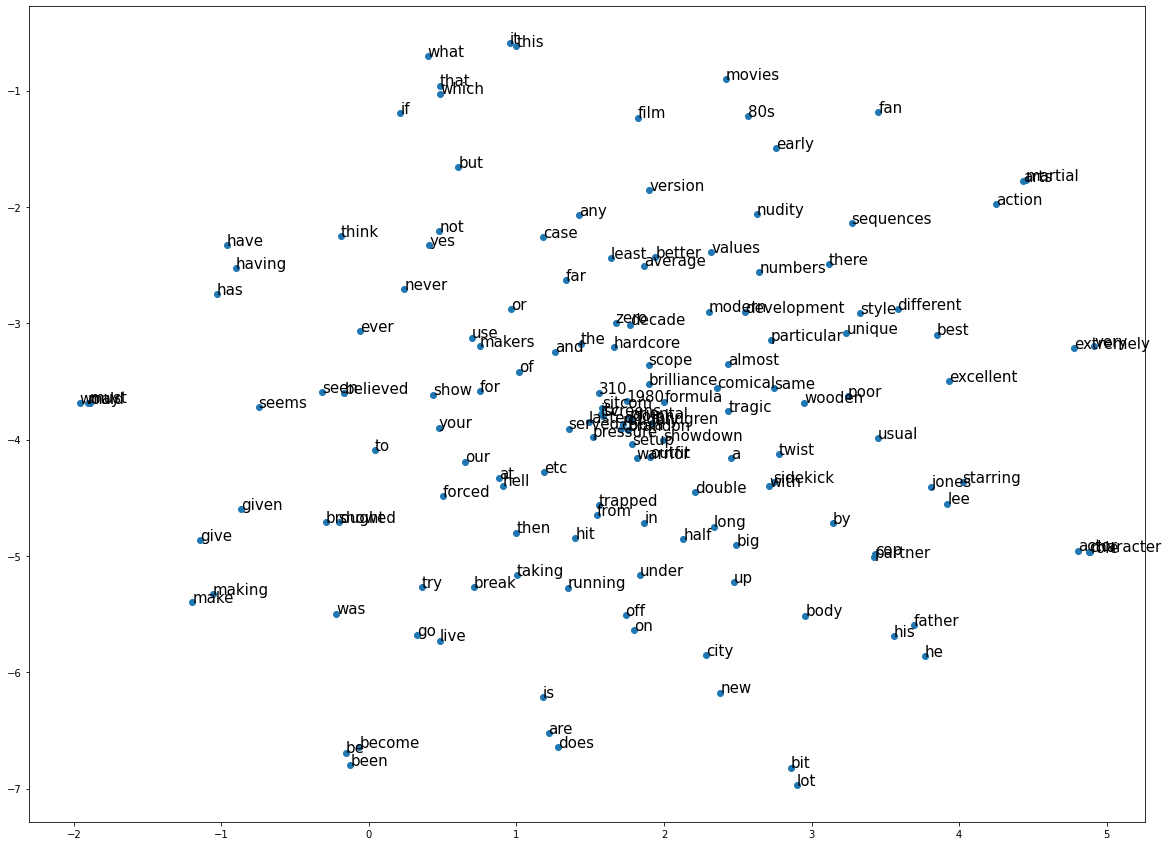

In [167]:
fig = plt.figure()
fig.set_size_inches(20,15)

ax = fig.add_subplot(1,1,1)
ax.scatter(df_temp['X'], df_temp['Y'])

# Put the label on each point.
for word, pos in df_temp.iterrows():
    ax.annotate(word, pos, fontsize = 15)
plt.show()

In [168]:
def makeFeatureVec(review, model, num_features):

    
    featureVec = np.zeros((num_features,), dtype = "float32")
    
    # Unique word set
    word_index = set(model.wv.index2word)
    
    # For division we need to count the number of words
    nword = 0
    
    # Iterate words in a review and if the word is in the unique wordset, add the vector values for each word.
    for word in review:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec,model[word])
    
    # Divide the sum of vector values by total number of word in a review.
    featureVec = np.divide(featureVec, nword)        
    
    return featureVec

In [169]:
def getAvgFeatureVec(clean_reviews, model, num_features):
    
    # Keep track of the sequence of reviews, create the number "th" variable.
    review_th = 0
    
    # Row: number of total reviews, Column: number of vector spaces (num_features = 400 we set this in Word2Vec step).
    reviewFeatureVecs = np.zeros((len(clean_reviews), num_features), dtype = "float32")
    
    # Iterate over reviews and add the result of makeFeatureVec.
    for review in clean_reviews:
        reviewFeatureVecs[int(review_th)] = makeFeatureVec(review, model, num_features)
        
        # Once the vector values are added, increase the one for the review_th variable.
        review_th += 1
    
    return reviewFeatureVecs

In [170]:
X_tv_word2vec = []

# Clean the reviews by preprocessing function with stopwords option "on".
for review in df_tv['review']:
    X_tv_word2vec.append(preprocess_word(review, stopwords = True))


In [171]:
# Apply "getAvgFeatureVec" function.
tic()
tvDataAvg = getAvgFeatureVec(X_tv_word2vec, model, num_features)
toc()

Elapsed time: 66.362393 seconds.



In [172]:
# Same steps repeats as we did for train_set.    
X_test_action_word2vec = []

for review in df_test_action["review"]:
    X_test_action_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_action = getAvgFeatureVec(X_test_action_word2vec, model, num_features)

In [173]:
# Same steps repeats as we did for train_set.    
X_test_adventure_word2vec = []

for review in df_test_adventure["review"]:
    X_test_adventure_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_adventure = getAvgFeatureVec(X_test_adventure_word2vec, model, num_features)

In [174]:
# Same steps repeats as we did for train_set.    
X_test_animation_word2vec = []

for review in df_test_animation["review"]:
    X_test_animation_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_animation = getAvgFeatureVec(X_test_animation_word2vec, model, num_features)

In [175]:
# Same steps repeats as we did for train_set.    
X_test_biography_word2vec = []

for review in df_test_biography["review"]:
    X_test_biography_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_biography = getAvgFeatureVec(X_test_biography_word2vec, model, num_features)

In [176]:
# Same steps repeats as we did for train_set.    
X_test_comedy_word2vec = []

for review in df_test_comedy["review"]:
    X_test_comedy_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_comedy = getAvgFeatureVec(X_test_comedy_word2vec, model, num_features)

In [177]:
# Same steps repeats as we did for train_set.    
X_test_horror_word2vec = []

for review in df_test_horror["review"]:
    X_test_horror_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_horror = getAvgFeatureVec(X_test_horror_word2vec, model, num_features)

In [178]:
# Same steps repeats as we did for train_set.    
X_test_romance_word2vec = []

for review in df_test_romance["review"]:
    X_test_romance_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_romance = getAvgFeatureVec(X_test_romance_word2vec, model, num_features)

In [179]:
# Same steps repeats as we did for train_set.    
X_test_scifi_word2vec = []

for review in df_test_scifi["review"]:
    X_test_scifi_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_scifi = getAvgFeatureVec(X_test_scifi_word2vec, model, num_features)

In [180]:
# Same steps repeats as we did for train_set.    
X_test_runtime_1_100_word2vec = []

for review in df_test_runtime_1_100["review"]:
    X_test_runtime_1_100_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_runtime_1_100 = getAvgFeatureVec(X_test_runtime_1_100_word2vec, model, num_features)

In [181]:
# Same steps repeats as we did for train_set.    
X_test_runtime_101_600_word2vec = []

for review in df_test_runtime_101_600["review"]:
    X_test_runtime_101_600_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg_runtime_101_600 = getAvgFeatureVec(X_test_runtime_101_600_word2vec, model, num_features)

In [182]:
# Same steps repeats as we did for train_set.    
X_test_word2vec = []

for review in df_test["review"]:
    X_test_word2vec.append(preprocess_word(review, stopwords = True))

testDataAvg = getAvgFeatureVec(X_test_word2vec, model, num_features)

##4 Modeling

In [183]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [184]:
# LinearSVC
tic()
sv = LinearSVC(random_state=2020)

param_grid1 = {
    'loss':['hinge', 'squared_hinge'],
    'class_weight':[{1:2},'balanced'],
    'C': [0.5,1,10,20],
    'penalty':['l2']
}

gs_sv = GridSearchCV(sv, param_grid = [param_grid1], verbose = 1, cv = pds, n_jobs = 1, scoring = 'roc_auc' )
gs_sv.fit(tvDataAvg, y_tv_int)
gs_sv_best = gs_sv.best_estimator_
print(gs_sv.best_params_)
print(gs_sv.best_score_)
toc()
#param_grid1 = {
#    'loss':['hinge', 'squared_hinge'],
#    'class_weight':[{1:2},'balanced'],
#    'C': [1,10,20],
#    'penalty':['l2']
#}
# {'C': 20, 'class_weight': {1: 2}, 'loss': 'squared_hinge', 'penalty': 'l2'} - 0.93508

Fitting 1 folds for each of 16 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  9.1min finished


{'C': 20, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'penalty': 'l2'}
0.9346444558106259
Elapsed time: 618.056368 seconds.



In [240]:
tic()
y_svm1 = gs_sv.predict(testDataAvg)
y_svm2 = gs_sv.predict(testDataAvg_action)
y_svm3 = gs_sv.predict(testDataAvg_adventure)
y_svm4 = gs_sv.predict(testDataAvg_animation)
y_svm5 = gs_sv.predict(testDataAvg_biography)
y_svm6 = gs_sv.predict(testDataAvg_comedy)
y_svm7 = gs_sv.predict(testDataAvg_horror)
y_svm8 = gs_sv.predict(testDataAvg_romance)
y_svm9 = gs_sv.predict(testDataAvg_scifi)
y_svm10 = gs_sv.predict(testDataAvg_runtime_1_100)
y_svm11 = gs_sv.predict(testDataAvg_runtime_101_600)
toc()

Elapsed time: 0.032191 seconds.



In [196]:
from sklearn.metrics import confusion_matrix
def evaluate_score(y_test,y_hat):
  TN, FP, FN, TP = confusion_matrix(y_test, y_hat).ravel()
  Accuracy = round((TP + TN)/(TP + TN + FP + FN),3)
  Precision = round((TP)/((TP) + (FP)),3)
  Recall = round((TP)/((TP) + (FN)),3)
  Specificity = round((TN)/((TN) + (FP)),3)
  False_Positive_Rate = round((FP)/((FP) + (TN)),3)
  F1_Score = round(2*(Precision * Recall)/(Precision + Recall),3)
  Balanced_Accuracy = round((Recall + Specificity)/2,3)
  #print('TN =', TN)
 # print('FP =', FP)
 # print('FN =', FN)
 # print('TP =', TP)
 # print('Accuracy =', Accuracy)
 # print('Precision =', Precision)
 # print('Recall =', Recall)
 # print('Specificity =', Specificity)
 # print('False_Positive_Rate =', False_Positive_Rate)
 # print('F1_Score =', F1_Score)
 # print('Balanced_Accuracy =', Balanced_Accuracy)
  res=pd.DataFrame([TN, FP, FN, TP, Accuracy, Precision, Recall, Specificity, False_Positive_Rate, F1_Score, Balanced_Accuracy])
  return(res)

In [197]:
res_word2vec_svm_test=evaluate_score(y_test_int,y_svm1)
res_word2vec_svm_runtime_1_100=evaluate_score(y_test_runtime_1_100_int,y_svm10)
res_word2vec_svm_runtime_101_600=evaluate_score(y_test_runtime_101_600_int,y_svm11)
res_word2vec_svm_action=evaluate_score(y_test_action_int,y_svm2)
res_word2vec_svm_adventure=evaluate_score(y_test_adventure_int,y_svm3)
res_word2vec_svm_animation=evaluate_score(y_test_animation_int,y_svm4)
res_word2vec_svm_biography=evaluate_score(y_test_biography_int,y_svm5)
res_word2vec_svm_comedy=evaluate_score(y_test_comedy_int,y_svm6)
res_word2vec_svm_horror=evaluate_score(y_test_horror_int,y_svm7)
res_word2vec_svm_romance=evaluate_score(y_test_romance_int,y_svm8)
res_word2vec_svm_scifi=evaluate_score(y_test_scifi_int,y_svm9)

In [198]:
res_word2vec_svm=pd.concat([res_word2vec_svm_test, res_word2vec_svm_runtime_1_100, res_word2vec_svm_runtime_101_600, 
                        res_word2vec_svm_action, res_word2vec_svm_adventure, res_word2vec_svm_animation, res_word2vec_svm_biography, 
                        res_word2vec_svm_comedy, res_word2vec_svm_horror, res_word2vec_svm_romance, res_word2vec_svm_scifi], axis=1, ignore_index=True)
res_word2vec_svm.columns=['Test_Split', 'Runtime_1_100', 'Runtime_101_600','Action', 'Adventure', 'Animation','Biography', 'Comedy', 'Horror','Romance', 'Sci_fi']
res_word2vec_svm.index=['TN', 'FP', 'FN', 'TP',' Accuracy', 'Precision', 'Recall', 'Specificity', 'FPR', 'F1', 'Balanced_Accuracy']

In [199]:
res_word2vec_svm

,Test_Split,Runtime_1_100,Runtime_101_600,Action,Adventure,Animation,Biography,Comedy,Horror,Romance,Sci_fi
TN,3298.000,166.000,162.000,180.000,173.000,61.000,109.000,158.000,207.000,140.000,197.000
FP,498.000,84.000,88.000,70.000,77.000,55.000,122.000,92.000,43.000,110.000,53.000
FN,583.000,80.000,47.000,73.000,58.000,13.000,40.000,46.000,86.000,43.000,93.000
TP,3121.000,170.000,203.000,177.000,192.000,103.000,191.000,204.000,164.000,207.000,157.000
Accuracy,0.856,0.672,0.730,0.714,0.730,0.707,0.649,0.724,0.742,0.694,0.708
Precision,0.862,0.669,0.698,0.717,0.714,0.652,0.610,0.689,0.792,0.653,0.748
Recall,0.843,0.680,0.812,0.708,0.768,0.888,0.827,0.816,0.656,0.828,0.628
Specificity,0.869,0.664,0.648,0.720,0.692,0.526,0.472,0.632,0.828,0.560,0.788
FPR,0.131,0.336,0.352,0.280,0.308,0.474,0.528,0.368,0.172,0.440,0.212
F1,0.852,0.674,0.751,0.712,0.740,0.752,0.702,0.747,0.718,0.730,0.683


The accuracy of test dataset is good, especially compared with the performance of extra test dataset. And we can found the accuracy for Horror films is better than movies with other genres. This might be because reviews including words like "frightening", "scared" are easily regarded as good reviews of horror films, but other films contain those words are often negative reviews. And this is why the precision of horror films is high, but the recall rate is low.  

On the other hand, we found that the FPR of biography is pretty high, this might be because it hard to find some words to express obvious positive or negative feelings for a biography film. In addition, the number of animation reviews is small, which may affect the performance of prediction.

In a word, there is obvious difference of prediction performance among movie reviews with different genres and runtimes. On the one hand, sentiment analysis seems not efficient to some type of movie like biography. On the other hand, some words are positive for this genre but negative in another type, which is we need to pay attention while doing the sentiment analysis.

### CNN


In [202]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, Flatten, Dropout, MaxPooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence

In [223]:
max_length = 400
top_words =len(vocab)
embedding_vector_length=32
model_CNN = Sequential()
model_CNN.add(Embedding(top_words, embedding_vector_length,input_length=tvDataAvg.shape[1]))
model_CNN .add(Conv1D(32, kernel_size= 3, padding= 'same', input_shape=(max_length, embedding_vector_length)))
model_CNN .add(Conv1D(32, kernel_size= 3, padding= 'same'))
model_CNN .add(MaxPooling1D(pool_size=2))
model_CNN .add(Conv1D(16, kernel_size= 3, padding= 'same'))
model_CNN .add(MaxPooling1D(pool_size=2))
model_CNN .add(Conv1D(64, kernel_size= 3, padding= 'same'))
model_CNN .add(MaxPooling1D(pool_size=2))
model_CNN .add(Flatten())
model_CNN .add(Dropout(0.2))
model_CNN .add(Dense(64, activation='sigmoid'))
model_CNN .add(Dropout(0.5))
model_CNN .add(Dense(1, activation='sigmoid'))
model_CNN .compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [224]:
model_CNN.fit(tvDataAvg, y_tv_int, epochs=3, batch_size=32)

Epoch 1/3
   1/1329 [..............................] - ETA: 0s - loss: 0.8059 - accuracy: 0.5625

InvalidArgumentError: ignored

I found there was something wrong, so I ran the code from https://github.com/ovguyo/moviereview and tried to find the problem.

In [215]:
np.random.seed(7)
top_words = 5000
(X_train1, y_train1), (X_test1, y_test1) = imdb.load_data(num_words=top_words)
max_length = 500
X_train1 = sequence.pad_sequences(X_train1, maxlen = max_length)
X_test1 = sequence.pad_sequences(X_test1, maxlen = max_length)
embedding_vector_length=32
model1 = Sequential()
model1.add(Embedding(top_words, embedding_vector_length, input_length=max_length))

In [216]:
model1.add(Conv1D(32, kernel_size= 3, padding= 'same', input_shape=(max_length, embedding_vector_length)))
model1.add(Conv1D(32, kernel_size= 3, padding= 'same'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(16, kernel_size= 3, padding= 'same'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(16, kernel_size= 3, padding= 'same'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='sigmoid'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_train1, y_train1, epochs=3, batch_size=32)

Epoch 1/3
782/782 [==============================] - 36s 46ms/step - loss: 0.4213 - accuracy: 0.7852
Epoch 2/3
782/782 [==============================] - 35s 45ms/step - loss: 0.2586 - accuracy: 0.8983
Epoch 3/3
782/782 [==============================] - 36s 46ms/step - loss: 0.2173 - accuracy: 0.9157


I found that the difference was the Embedding layer, the above code gave corresponding index for each word in the review sentence, and then used "sequence.pad_sequence" to make sure each transformed sentence (from texture to numerical) have the same length. Then the result of Embedding layer is a len(sample)$\times$ max_length$\times$embedding_vector_length matrix, where the embedding_vector_length means the Embedding layer mapped each word into a embedding_vector_length-dimension space and got its feature vetor.

However, what the Word2Vec method did was: first of all, this method counted the word frequency of all words in the trainning set, and assigned indexes for each word according to the word frequency from high to low. Secondly, for each review in the testing data set, feature vectors (gotten from the training word2vec model) are first assigned to each word that appeared in the previous trainning set, then the average value of the word vectors of this review was calculated, and finally the len(sample)$\times$num_features matrix was obtained, which means we lack the dimension corresponding to "max_length" in the Embedding layer example.

In order to make the output dimension from Word2Vec model match that from the Embedding layer, I tried to change the makeFeatureVec function in Word2Vec part, however, since the num_features is 400 and the training dataset is large, the colab always crashed once I was trying to use Word2Vec model to transform texture data. Therefore, I put the result of Embedding layer method to show the code works, and due to the time limitation of project and memory restrication in Colab, I cannot find a good method to solve this problem.